In [1]:
#Introduction
"""
Purpose of this project: 
    Predict the causes of low birth weight.
    Steps: 
    1) Importing and analysing the data
    2) Missing values detection
    3) Flagging and Imputation
    4) Feature Engineering 
    5) OLS model
    6) Lasso model
    7) ARD model
    8) Knn models (Standarized/ Not Standarized)
    7) Model selection
    
"""

'\nPurpose of this project: \n    Predict the causes of low birth weight.\n    Steps: \n    1) Importing and analysing the data\n    2) Missing values detection\n    3) Flagging and Imputation\n    4) Feature Engineering \n    5) OLS model\n    6) Lasso model\n    7) ARD model\n    8) Knn models (Standarized/ Not Standarized)\n    7) Model selection\n    \n'

# Importing Dataset

In [2]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns  # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
import sklearn.linear_model
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying the path and file name
file = './birthweight_low.xlsx'

# reading the file into Python
birthweight = pd.read_excel(file)

# checking the file
birthweight.head(n=10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [3]:
#printing dataset size and columns information
print(f"""
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}
""")
birthweight.info()


Size of Original Dataset
------------------------
Observations: 196
Features:     18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


# Preparing the data

## Missing Values

In [4]:
# checking each data point for missing values through method chaining
birthweight.isnull().sum(axis = 0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

count    193.000000
mean      13.911917
std        2.055864
min        8.000000
25%       12.000000
50%       14.000000
75%       16.000000
max       17.000000
Name: meduc, dtype: float64


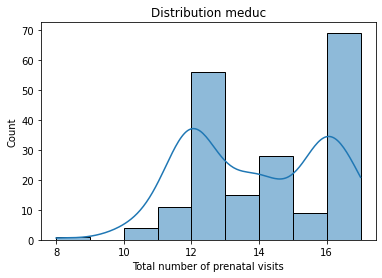

In [5]:
#checking the distribution of the columns with missing values
meduc_dist = birthweight['meduc'].describe()
print(meduc_dist)

#constructing the histplot
sns.histplot(data  = birthweight,
         x     = 'meduc',
        kde    = True)

plt.title(label   = "Distribution meduc")
plt.xlabel(xlabel = "Total number of prenatal visits") 
plt.ylabel(ylabel = "Count")

plt.show()

In [6]:
#Replacing the missing values with the mean
meduc_mean = birthweight['meduc'].mean()

birthweight['meduc'].fillna(value = meduc_mean,
                         inplace = True)

count    193.000000
mean      11.601036
std        4.267293
min        2.000000
25%       10.000000
50%       12.000000
75%       12.000000
max       35.000000
Name: npvis, dtype: float64


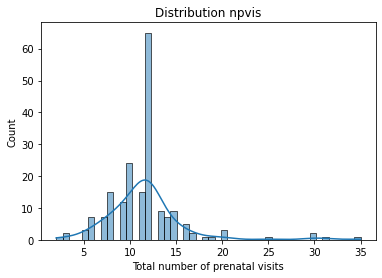

In [7]:
#checking the distribution of the columns with missing values
npvis_dist = birthweight['npvis'].describe()
print(npvis_dist)

#constructing the histplot
sns.histplot(data  = birthweight,
         x     = 'npvis',
        kde    = True)

plt.title(label   = "Distribution npvis")
plt.xlabel(xlabel = "Total number of prenatal visits") 
plt.ylabel(ylabel = "Count")

plt.show()

In [8]:
#Replacing the missing values with the median
npvis_median = birthweight['npvis'].median()

birthweight['npvis'].fillna(value = npvis_median,
                         inplace = True)

count    189.000000
mean      13.846561
std        2.634217
min        1.000000
25%       12.000000
50%       14.000000
75%       16.000000
max       17.000000
Name: feduc, dtype: float64


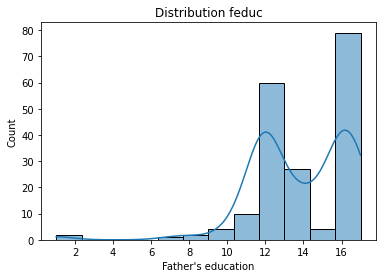

In [9]:
#checking the distribution of the columns with missing values
feduc_dist = birthweight['feduc'].describe()
print(feduc_dist)

#constructing the histplot
sns.histplot(data  = birthweight,
         x     = 'feduc',
        kde    = True)

plt.title(label   = "Distribution feduc")
plt.xlabel(xlabel = "Father's education") 
plt.ylabel(ylabel = "Count")

plt.show()

In [10]:
#Replacing the missing values with the mean
feduc_mean = birthweight['feduc'].mean()

birthweight['feduc'].fillna(value = feduc_mean,
                         inplace = True)

## Describing the data

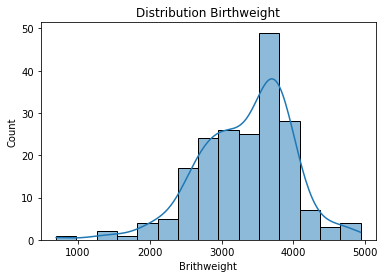

In [11]:
#Destribution of the dependant variable
sns.histplot(data  = birthweight,
         x     = 'bwght',
        kde    = True)

plt.title(label   = "Distribution Birthweight")
plt.xlabel(xlabel = "Brithweight") 
plt.ylabel(ylabel = "Count")


plt.show()

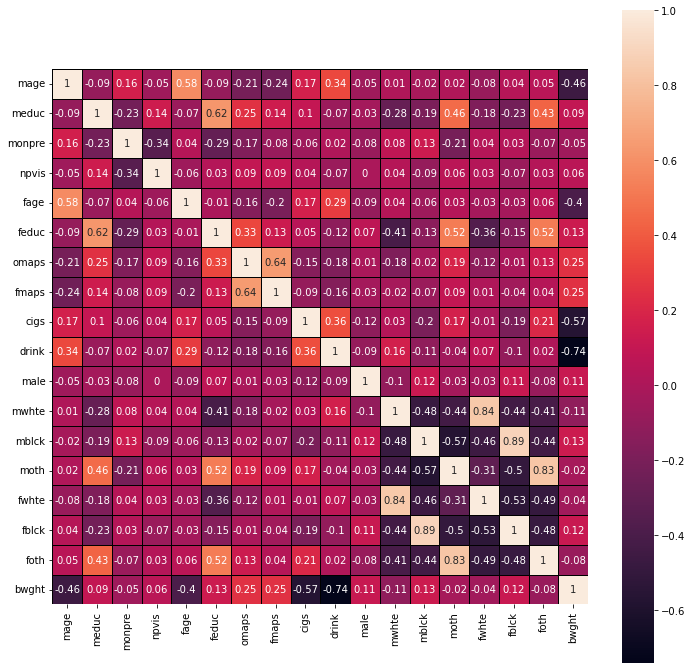

In [12]:
#Creating a variable for the correlation
birthweight_corr = birthweight.corr(method = 'pearson').round(2)

#Heatmap to see the correlation between all variables
fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(data       = birthweight_corr, 
            cmap       = 'rocket',     
            square     = True,         
            annot      = True,        
            linecolor  = 'black',
            linewidths = 0.5) 
plt.show()

In [13]:
#Looking at the correlation between the independant variables and the dependant variable
birthweight_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght     1.00
omaps     0.25
fmaps     0.25
feduc     0.13
mblck     0.13
fblck     0.12
male      0.11
meduc     0.09
npvis     0.06
moth     -0.02
fwhte    -0.04
monpre   -0.05
foth     -0.08
mwhte    -0.11
fage     -0.40
mage     -0.46
cigs     -0.57
drink    -0.74
Name: bwght, dtype: float64

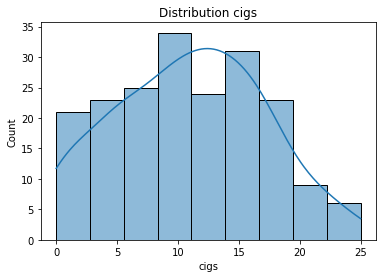

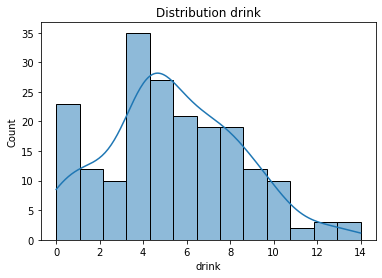

In [14]:
#Looking at the distribution of the variables with highest correlation
#distribution for the variable cigs
sns.histplot(data  = birthweight,
         x     = 'cigs',
        kde    = True)

plt.title(label   = "Distribution cigs")
plt.show()

#distribution for the variable drink
sns.histplot(data  = birthweight,
         x     = 'drink',
        kde    = True)

plt.title(label   = "Distribution drink")
plt.show()

# Building a base model

In [15]:
#Replacing variables with high skewness by it's logarithm
birthweight['log_monpre'] = np.log(birthweight['monpre'])
birthweight['log_npvis'] = np.log(birthweight['npvis'])
birthweight['log_fage'] = np.log(birthweight['fage'])
birthweight['log_feduc'] = np.log(birthweight['feduc'])

In [16]:
#creting new variables to improve the model
birthweight['cigs&drink'] = birthweight['cigs']*birthweight['drink']
birthweight['age_parents'] = birthweight['mage']*birthweight['log_fage']
birthweight['age_low_fertility'] = birthweight.loc[ : , 'mage'][birthweight.loc[ : , 'mage']>35]
birthweight['cigs_high'] = birthweight.loc[ : , 'cigs'][birthweight.loc[ : , 'cigs']>19]
birthweight['drinks_high'] = birthweight.loc[ : , 'drink'][birthweight.loc[ : , 'drink']>10]
birthweight['low_npvis'] = birthweight.loc[ : , 'npvis'][birthweight.loc[ : , 'npvis']<=5]

#replacing missing values in the new variables for 0
birthweight['age_low_fertility'].fillna(value = 0, inplace = True)
birthweight['cigs_high'].fillna(value = 0, inplace = True)
birthweight['drinks_high'].fillna(value = 0, inplace = True)
birthweight['low_npvis'].fillna(value = 0, inplace = True)

#creting new variables
birthweight['cigs_h&drink_h'] = birthweight['cigs_high']*birthweight['drinks_high']
birthweight['cd'] = birthweight['cigs']+birthweight['drink']
birthweight['cdh'] = birthweight['cigs_high']+birthweight['drinks_high']

In [17]:
# declaring other set of x-variables
x_2 = ['cigs', 'drink','cigs_h&drink_h']

In [18]:
# declaring other set of x-variables
x_3 = ['cigs', 'drink','cigs&drink']

In [19]:
# declaring other set of x-variables
x_6 = ['cigs', 'drink','cd']

In [20]:
# declaring other set of x-variables
x_7 = ['cigs', 'drink','cdh']

# OLS

In [21]:
#TRAINING AND TESTING SETS FOR OLS REGRESSION

# preparing explanatory variable data
ols_data   = birthweight.loc[: , x_3]

# preparing response variables
birthweight_target = birthweight.loc[ : , 'bwght']

# preparing training and testing sets
x_train_ols, x_test_ols, y_train_ols, y_test_ols = train_test_split(
            ols_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train_ols.shape}
y-side: {y_train_ols.shape}


Testing Data
------------
X-side: {x_test_ols.shape}
y-side: {y_test_ols.shape}
""")


Training Data
-------------
X-side: (147, 3)
y-side: (147,)


Testing Data
------------
X-side: (49, 3)
y-side: (49,)



In [22]:
# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(x_train_ols, y_train_ols)

# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_ols)

# SCORING the results
lr_train_score = lr.score(x_train_ols, y_train_ols).round(2)
lr_test_score = lr.score(x_test_ols, y_test_ols).round(2)

# printing the results
print('OLS Training Score :', lr_train_score) 
print('OLS Testing Score  :',  lr_test_score) 

# displaying and saving the gap between training and testing
lr_test_gap = abs(lr_train_score - lr_test_score).round(2)
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(2))

OLS Training Score : 0.67
OLS Testing Score  : 0.71
OLS Train-Test Gap : 0.04


# LASSO

In [23]:
#TRAINING AND TESTING SETS FOR LASSO REGRESSION

# preparing explanatory variable data
lasso_data   = birthweight.loc[: , x_6]

# preparing training and testing sets
x_train_lasso, x_test_lasso, y_train_lasso, y_test_lasso = train_test_split(
            lasso_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train_lasso.shape}
y-side: {y_train_lasso.shape}


Testing Data
------------
X-side: {x_test_lasso.shape}
y-side: {y_test_lasso.shape}
""")


Training Data
-------------
X-side: (147, 3)
y-side: (147,)


Testing Data
------------
X-side: (49, 3)
y-side: (49,)



In [24]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True)

# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_lasso, y_train_lasso)

# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_lasso)

# SCORING and printing the results
print('Lasso Training Score :', lasso_model.score(x_train_lasso, y_train_lasso).round(2))
print('Lasso Testing Score  :', lasso_model.score(x_test_lasso, y_test_lasso).round(2))

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_lasso, y_train_lasso).round(2) 
lasso_test_score  = lasso_model.score(x_test_lasso, y_test_lasso).round(2) 

# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(2))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(2)

Lasso Training Score : 0.64
Lasso Testing Score  : 0.73
Lasso Train-Test Gap : 0.04


# ARD

In [25]:
#TRAINING AND TESTING SETS FOR ARD REGRESSION

# preparing explanatory variable data
ARD_data   = birthweight.loc[: , x_7]

# preparing training and testing sets
x_train_ARD, x_test_ARD, y_train_ARD, y_test_ARD = train_test_split(
            ARD_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train_ARD.shape}
y-side: {y_train_ARD.shape}


Testing Data
------------
X-side: {x_test_ARD.shape}
y-side: {y_test_ARD.shape}
""")


Training Data
-------------
X-side: (147, 3)
y-side: (147,)


Testing Data
------------
X-side: (49, 3)
y-side: (49,)



In [26]:
# INSTANTIATING a model object
ARD_model = sklearn.linear_model.ARDRegression(normalize = True)

# FITTING the training data
ARD_fit = ARD_model.fit(x_train_ARD, y_train_ARD)

# PREDICTING on new data
ARD_pred = ARD_fit.predict(x_test_ARD)

# SCORING and printing the results
print('ARD Training Score :', ARD_model.score(x_train_ARD, y_train_ARD).round(2))
print('ARD Testing Score  :', ARD_model.score(x_test_ARD, y_test_ARD).round(2))

# saving scoring data for future use
ARD_train_score = ARD_model.score(x_train_ARD, y_train_ARD).round(2) 
ARD_test_score  = ARD_model.score(x_test_ARD, y_test_ARD).round(2) 

# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ARD_train_score - ARD_test_score).round(2))
ARD_test_gap = abs(ARD_train_score - ARD_test_score).round(2)

ARD Training Score : 0.66
ARD Testing Score  : 0.72
ARD Train-Test Gap : 0.06


# KNN

## NonStandarized Data

In [27]:
#TRAINING AND TESTING SETS FOR KNN REGRESSION

# preparing explanatory variable data
k_data   = birthweight.loc[: , x_2]

# preparing training and testing sets
x_train_k, x_test_k, y_train_k, y_test_k = train_test_split(
            k_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train_k.shape}
y-side: {y_train_k.shape}


Testing Data
------------
X-side: {x_test_k.shape}
y-side: {y_test_k.shape}
""")


Training Data
-------------
X-side: (147, 3)
y-side: (147,)


Testing Data
------------
X-side: (49, 3)
y-side: (49,)



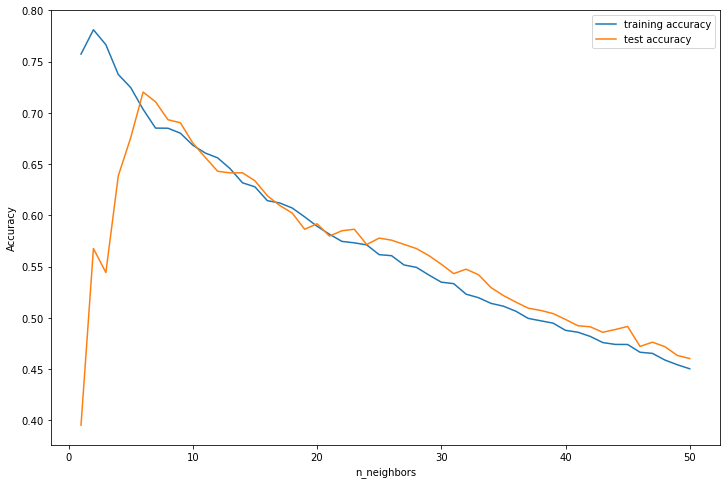

The optimal number of neighbors is 6


In [28]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []

# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)

#creating the model
for n_neighbors in neighbors_settings:
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_k, y_train_k)
    
    #recording the accuracy
    training_accuracy.append(clf.score(x_train_k, y_train_k))
    
    test_accuracy.append(clf.score(x_test_k, y_test_k))

# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [29]:
# INSTANTIATING the model
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)

# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(x_train_k, y_train_k)

# PREDITCING on new data
knn_opt_pred = knn_opt.predict(x_test_k)

# SCORING and saving the results
knn_opt_score_train = knn_opt.score(x_train_k, y_train_k).round(2)
knn_opt_score_test  = knn_opt.score(x_test_k, y_test_k).round(2)

#printing the results
print('KNN Training Score:', knn_opt_score_train)
print('KNN Testing Score :',  knn_opt_score_test)

# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_opt_score_train - knn_opt_score_test).round(2))
knn_opt_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(2)

KNN Training Score: 0.7
KNN Testing Score : 0.72
KNN Train-Test Gap: 0.02


## Standarized Data

In [30]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# preparing explanatory variable data
k_data_s   = birthweight.loc[: , x_7]

# FITTING the scaler
scaler.fit(k_data_s)

# TRANSFORMING our data after fit
k_scaled = scaler.transform(k_data_s)

# converting scaled data into a DataFrame
k_scaled_df = pd.DataFrame(k_scaled)

# checking the results
k_scaled_df.describe().round(2)

# adding labels to the DataFrame
k_scaled_df.columns = k_data_s.columns

#  Checking the difference between scaled and non-scaled data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(k_data)}


Dataset AFTER Scaling
----------------------
{np.var(k_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
cigs               37.035714
drink               8.964077
cigs_h&drink_h    702.612323
dtype: float64


Dataset AFTER Scaling
----------------------
cigs     1.0
drink    1.0
cdh      1.0
dtype: float64



In [31]:
# preparing training and testing sets
x_train_STAND, x_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            k_scaled,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)

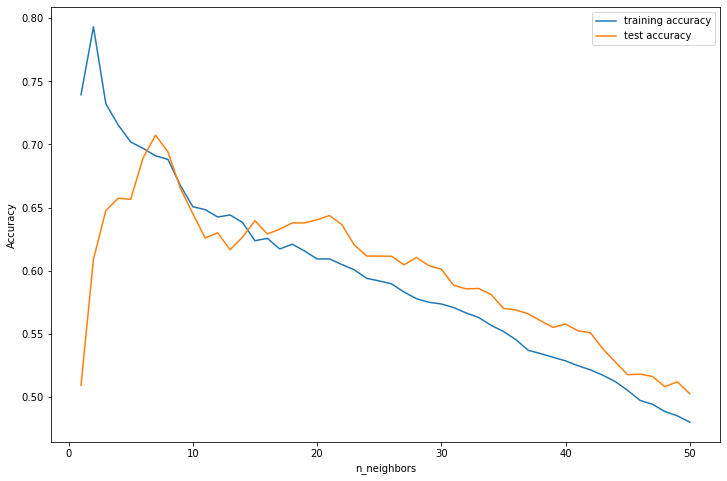

The optimal number of neighbors is 6


In [32]:
# creating lists for training set accuracy and test set accuracy
training_accuracy_sc = []
test_accuracy_sc = []

# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)

#creating the model
for n_neighbors in neighbors_settings:
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_STAND, y_train_STAND)
    
    #recording the accuracy
    training_accuracy_sc.append(clf.score(x_train_STAND, y_train_STAND))
    
    test_accuracy_sc.append(clf.score(x_test_STAND, y_test_STAND))

# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy_sc, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy_sc,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# finding the optimal number of neighbors
opt_neighbors_STAND = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors_STAND}""")

In [33]:
# INSTANTIATING the model 
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = opt_neighbors_STAND)

# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(x_train_STAND, y_train_STAND)

# PREDITCING on new data
knn_stand_pred = knn_stand.predict(x_test_STAND)

# SCORING and saving the results
knn_stand_score_train = knn_stand.score(x_train_STAND, y_train_STAND).round(2)
knn_stand_score_test  = knn_stand.score(x_test_STAND, y_test_STAND).round(2)

#printing the results
print('KNN Training Score:', knn_stand_score_train)
print('KNN Testing Score :',  knn_stand_score_test)

# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(2))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(2)

KNN Training Score: 0.7
KNN Testing Score : 0.69
KNN Train-Test Gap: 0.01


# Model Comparison

In [34]:
#Comparing results of all models
print(f"""
Model                Train Score            Test Score           Train-Test Gap                                 
-----                -----------            ----------           --------------
OLS                     {lr_train_score}               {lr_test_score}                  {lr_test_gap}
Lasso (FINAL MODEL)     {lasso_train_score}               {lasso_test_score}                  {lasso_test_gap}
ARD                     {ARD_train_score}               {ARD_test_score}                   {ARD_test_gap}
KNN Non-Standardized    {knn_opt_score_train}               {knn_opt_score_test}                  {knn_opt_test_gap}
KNN Standardized        {knn_stand_score_train}               {knn_stand_score_test}                  {knn_stand_test_gap}
""")


Model                Train Score            Test Score           Train-Test Gap                                 
-----                -----------            ----------           --------------
OLS                     0.67               0.71                  0.04
Lasso (FINAL MODEL)     0.64               0.73                  0.04
ARD                     0.66               0.72                   0.06
KNN Non-Standardized    0.7               0.72                  0.02
KNN Standardized        0.7               0.69                  0.01



In [36]:
#Defining chosen model
print(f"""
FINAL MODEL : Lasso
Final Train Score: {lasso_train_score}
Final Test Score: {lasso_test_score}  
Final Train-Test Gap: {lasso_test_gap}
""")


FINAL MODEL : Lasso
Final Train Score: 0.64
Final Test Score: 0.73  
Final Train-Test Gap: 0.04

